# Preparing data


Import all the necessary libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the data file from GitHub

In [78]:
stroke = pd.read_csv('https://raw.githubusercontent.com/CinderLeaf/CIS9660_Project1/main/healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Check the dataset to see how many rows and columns it has

In [79]:
stroke.shape

(5110, 12)

Check the data type for each column

In [80]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Looks like there are some missing values in column bmi. Check how many percentage of data is missing in bmi

In [81]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [82]:
stroke['bmi'].isnull().sum() / len(stroke['bmi']) * 100

3.9334637964774952

Since it is only roughly 4% of the dataset, I decided to drop all the missing values from the bmi column

In [83]:
stroke.dropna(inplace = True)
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Drop the id column since it is irrelevant in this project

In [84]:
stroke.drop(['id'], axis = 1, inplace = True)

Check the dataset after all the missing values and the id column are dropped

In [85]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Check the details of the dataset

In [86]:
stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Visualizations

Generate a correlation matrix to see the correlation between all the numeric features

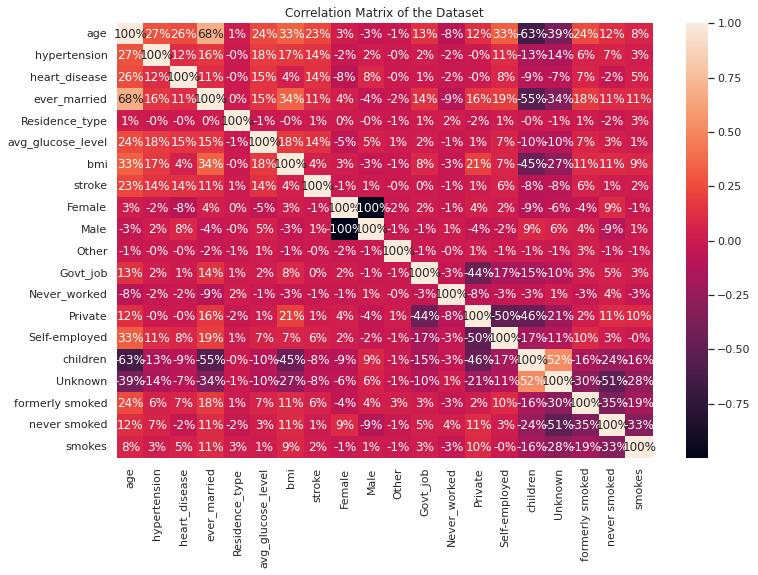

In [133]:
#Set the height and width of all figures
sns.set(rc={'figure.figsize':(12,8)})

sns.heatmap(stroke.corr(), annot =True, fmt = '.0%').set(title = "Correlation Matrix of the Dataset")
plt.show()

Generate a histogram to see the age distribution of the dataset

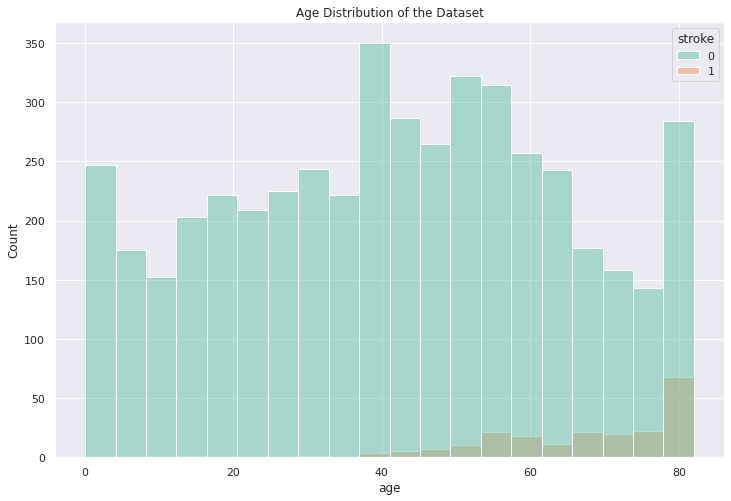

In [88]:
sns.histplot(x = stroke['age'], hue = stroke['stroke'], palette = 'Set2').set(title = 'Age Distribution of the Dataset')
plt.show()

Generate a boxplot to compare the BMI between people who had stroke and people who never had a stroke

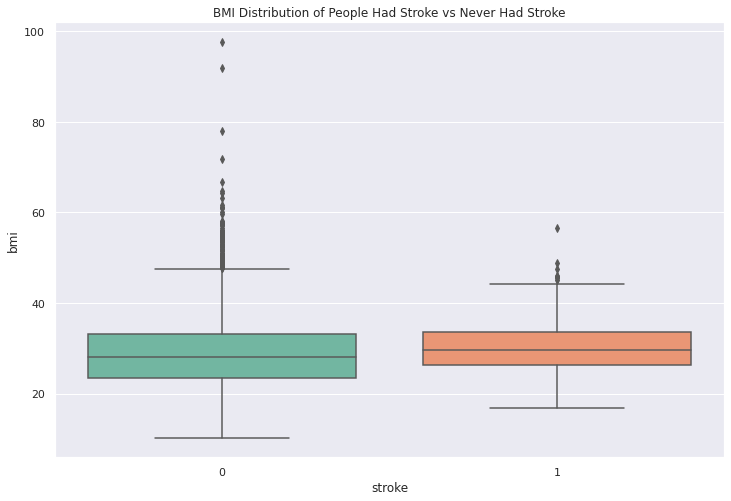

In [89]:
sns.boxplot(x = 'stroke', y = 'bmi', data = stroke, palette = 'Set2').set(title = 'BMI Distribution of People Had Stroke vs Never Had Stroke')
plt.show()

Generate a boxplot to compare the average glucose level between people who had stroke and people who never had a stroke

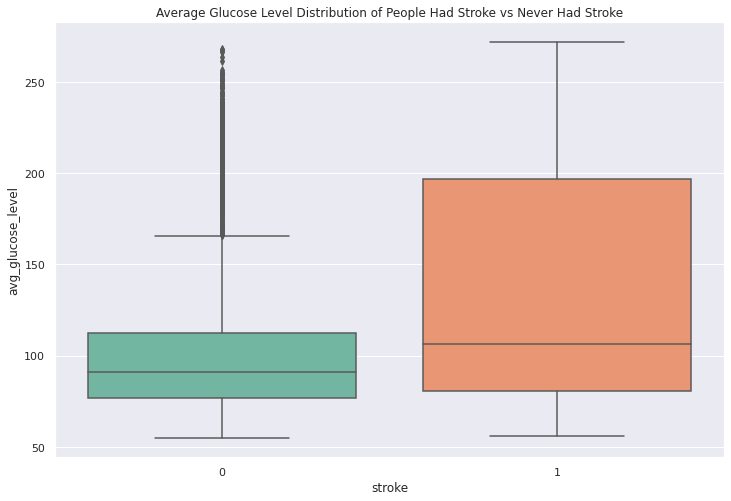

In [90]:
sns.boxplot(x = 'stroke', y = 'avg_glucose_level', data = stroke, palette = 'Set2').set(title = 'Average Glucose Level Distribution of People Had Stroke vs Never Had Stroke')
plt.show()

Generate pie chart to see the different percentage of smoking status among those who never had a stroke

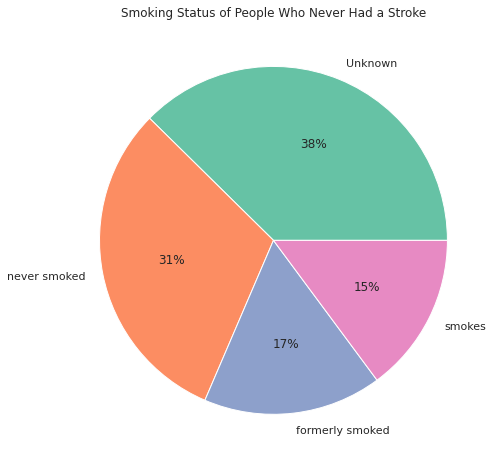

In [91]:
stroke_no = stroke.loc[stroke['stroke'] == 0]
smoke = stroke_no['smoking_status'].unique()

smoke_counts = stroke_no['smoking_status'].value_counts()
smoke_counts

colors = sns.color_palette('Set2')

plt.pie(smoke_counts.values, labels = smoke, colors = colors, autopct = '%.0f%%')
plt.title('Smoking Status of People Who Never Had a Stroke')
plt.show()

Generate pie chart to see the different percentage of smoking status among those who had a stroke

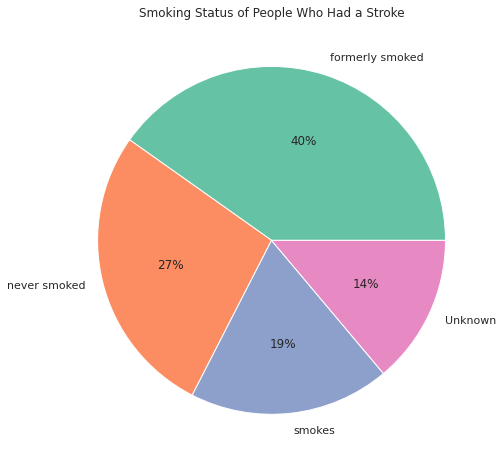

In [92]:
stroke_yes = stroke.loc[stroke['stroke'] == 1]
smoke = stroke_yes['smoking_status'].unique()

smoke_counts = stroke_yes['smoking_status'].value_counts()
smoke_counts

colors = sns.color_palette('Set2')

plt.pie(smoke_counts.values, labels = smoke, colors = colors, autopct = '%.0f%%')
plt.title('Smoking Status of People Who Had a Stroke')
plt.show()

# Training Models

## Preset

Columns *gender, ever_married, work_type, Residence_type, smoking_status* are categorical data, we need to convert them into numeric data so that the model can read and learn the patterns. Perform a one hot encoding to convert these columns into encoded columns

In [93]:
#Convert the categorical column by doing one hot encoding
gender_encoding = pd.get_dummies(stroke['gender'])
work_type_encoding = pd.get_dummies(stroke['work_type'])
smoking_status_encoding = pd.get_dummies(stroke['smoking_status'])

#Columns 'ever_married' and 'Residence_type' only have two categorical, so we can directly encoded it in the dataframe
stroke['ever_married'] = pd.get_dummies(stroke['ever_married'], drop_first=True)
stroke['Residence_type'] = pd.get_dummies(stroke['Residence_type'], drop_first=True)

#Drop the original columns
stroke.drop(['gender', 'work_type', 'smoking_status'], axis = 1, inplace = True)

#Add the encoded columns back to the dataset
stroke = stroke.join(gender_encoding)
stroke = stroke.join(work_type_encoding)
stroke = stroke.join(smoking_status_encoding)

#Check the dataset to make sure everything is added correctly
stroke.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,0
2,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.0,1,1,0,0,0,0,0,1,0,0,0,1,0
5,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0,0,1,0,0


Separate the features (x-variables) from the labels (y-variable). The label will be the *stroke* column, and the features will be all the other columns.

In [94]:
#Define the features
X = stroke.drop(['stroke'], axis = 1).values
X

array([[67.,  0.,  1., ...,  1.,  0.,  0.],
       [80.,  0.,  1., ...,  0.,  1.,  0.],
       [49.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [35.,  0.,  0., ...,  0.,  1.,  0.],
       [51.,  0.,  0., ...,  1.,  0.,  0.],
       [44.,  0.,  0., ...,  0.,  0.,  0.]])

In [95]:
#Define the label
y = stroke['stroke'].values
y

array([1, 1, 1, ..., 0, 0, 0])

Split the dataset into training and test sets

In [96]:
#import the maching learning library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

Perform feature scaling since there are many outliers in the BMI and avg_glucose_level

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Start Training the models

### KNN

Train the KNN model with the training dataset

In [98]:
#Import all the necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Train the KNN model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

Perform a 5-Fold Cross Validation for KNN

In [99]:
kf = KFold(n_splits = 5)

#Validate the training model based on its accuracy
result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring = 'accuracy')
print(f'Avg accurary: {result.mean()}')

Avg accurary: 0.9548919298601943


KNN - Using the model to make predictions on the test dataset

In [100]:
#Predict the test set results
y_pred_knn = knn.predict(X_test)

KNN - Classification report

In [101]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1412
           1       0.20      0.02      0.03        61

    accuracy                           0.96      1473
   macro avg       0.58      0.51      0.50      1473
weighted avg       0.93      0.96      0.94      1473



### NB

Train the NB model with the training dataset

In [102]:
#Train the NB model
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

Perform a 5-Fold Cross Validation for NB

In [103]:
#Validate the training model based on its accuracy
result = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring = 'accuracy')
print(f'Avg accurary: {result.mean()}')

Avg accurary: 0.2936372329982059


NB - Using the model to make predictions on the test dataset

In [104]:
#Predict the test set results
y_pred_gnb = gnb.predict(X_test)

NB - Classification report

In [105]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       1.00      0.28      0.44      1412
           1       0.06      1.00      0.11        61

    accuracy                           0.31      1473
   macro avg       0.53      0.64      0.28      1473
weighted avg       0.96      0.31      0.43      1473



### Logistic Regression

Train the Logisitic Regression model with training dataset

In [106]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train.ravel())

LogisticRegression()

Perform a 5-Fold Cross Validation for Logistic Regression

In [107]:
#Validate the training model based on its accuracy
result = cross_val_score(log_reg, X_train, y_train.ravel(), cv = kf, scoring = 'accuracy')
print(f'Avg accurary: {result.mean()}')

Avg accurary: 0.9569293524254426


Log_Reg - Using the model to make predictions on the test dataset

In [108]:
#Predict the test set results
y_pred_log = log_reg.predict(X_test)

Log_Reg - Classification report

In [109]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1412
           1       0.00      0.00      0.00        61

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.92      0.96      0.94      1473



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [137]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_parameters = {
                  'C': [0.001, 0.01, 0.1, 1, 10],
                  'gamma': [0.001, 0.01, 0.1, 1],
                  'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
                  }

SVM = SVC()
                
clf = GridSearchCV(SVM,         # model
                  param_grid = svm_parameters,   # hyperparameters
                  scoring='accuracy',        # metric for scoring
                  cv=5,                      # number of folds
                  verbose=2)                     

try:
  clf.fit(X_train, y_train.ravel())
except ValueError:
  print('Incompatible Parameters')

#best combination of parameters
print(clf.best_params_)

#Best CV Score 
print(clf.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ..................C=0.001, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..................C=0.001, gamma=0.001

Train the SVM model with training dataset

In [134]:
from sklearn import svm

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid', C=0.1, gamma=0.1, decision_function_shape='ovo').fit(X_train, y_train.ravel())

Perform a 5-Fold Cross Validation for SVM

In [111]:
#Validate the training model based on its accuracy
#Linear kernel
result = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring = 'accuracy')
print(f'Avg accurary: {result.mean()}')

Avg accurary: 0.9569297755661623


In [112]:
#Radial Basis Function kernel
result = cross_val_score(rbf, X_train, y_train.ravel(), cv = kf, scoring = 'accuracy')
print(f'Avg accurary: {result.mean()}')

Avg accurary: 0.9560564131207474


In [113]:
#Polynomial kernel
result = cross_val_score(poly, X_train, y_train.ravel(), cv = kf, scoring = 'accuracy')
print(f'Avg accurary: {result.mean()}')

Avg accurary: 0.9546008090450562


In [135]:
#Sigmoid kernel
result = cross_val_score(sig, X_train, y_train.ravel(), cv = kf, scoring = 'accuracy')
print(f'Avg accurary: {result.mean()}')

Avg accurary: 0.9560564131207474


SVM - Using the model to make predictions on the test dataset and print classification report

In [115]:
#Linear kernel
svm_linear_pred = linear.predict(X_test)

print(classification_report(y_test, svm_linear_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1412
           1       0.00      0.00      0.00        61

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.92      0.96      0.94      1473



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
#Radial Basis Function kernel
svm_rbf_pred = rbf.predict(X_test)

print(classification_report(y_test, svm_rbf_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1412
           1       0.00      0.00      0.00        61

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.92      0.96      0.94      1473



In [117]:
#Polynomial kernel
svm_poly_pred = poly.predict(X_test)

print(classification_report(y_test, svm_poly_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1412
           1       0.17      0.02      0.03        61

    accuracy                           0.96      1473
   macro avg       0.56      0.51      0.50      1473
weighted avg       0.93      0.96      0.94      1473



In [136]:
#Sigmoid kernel
svm_sig_pred = sig.predict(X_test)

print(classification_report(y_test, svm_sig_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1412
           1       0.00      0.00      0.00        61

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.92      0.95      0.94      1473



### Decision Tree

Train the Decision Tree model with training dataset

In [120]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train.ravel())

DecisionTreeClassifier()

Get the parameters of the Decision Tree

In [121]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Perform a 5-Fold Cross Validation for Decision Tree

In [122]:
#Validate the training model based on its accuracy
result = cross_val_score(dt, X_train, y_train.ravel(), cv = kf, scoring = 'accuracy')
print(f'Avg accurary: {result.mean()}')

Avg accurary: 0.9185119833451812


Decision Tree - Using the model to make predictions on the test dataset

In [123]:
#Predict the test set results
y_pred_dt = dt.predict(X_test)

Decision Tree - Classification report

In [124]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1412
           1       0.15      0.18      0.16        61

    accuracy                           0.92      1473
   macro avg       0.56      0.57      0.56      1473
weighted avg       0.93      0.92      0.93      1473



Feature Importance 

In [125]:
dt.feature_importances_

array([0.21254483, 0.05227997, 0.00942615, 0.00962676, 0.02386512,
       0.26395023, 0.25795743, 0.01622324, 0.02533078, 0.        ,
       0.01439374, 0.        , 0.02062552, 0.01178955, 0.        ,
       0.00886946, 0.01124295, 0.02545382, 0.03642044])

In [126]:
X = stroke.drop(['stroke'], axis = 1)
feature_names = X.columns

In [127]:
feature_importance = pd.DataFrame(dt.feature_importances_, index = feature_names).sort_values(0, ascending = False)
feature_importance

,0
avg_glucose_level,0.263950
bmi,0.257957
age,0.212545
hypertension,0.052280
smokes,0.036420
never smoked,0.025454
Male,0.025331
Residence_type,0.023865
Private,0.020626
Female,0.016223


### Random Forest

Train the Random Forest model with training dataset

In [128]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, criterion = 'gini', random_state = 1)
rf.fit(X_train, y_train.ravel())

RandomForestClassifier(n_estimators=10, random_state=1)

Perform a 5-Fold Cross Validation for Decision Tree

In [129]:
#Validate the training model based on its accuracy
result = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring = 'accuracy')
print(f'Avg accurary: {result.mean()}')

Avg accurary: 0.9534371720659423


Random Forest - Using the model to make predictions on the test dataset

In [130]:
#Predict the test set results
y_pred_rf = rf.predict(X_test)

Random Forest - Classification report

In [131]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1412
           1       0.12      0.02      0.03        61

    accuracy                           0.95      1473
   macro avg       0.54      0.51      0.50      1473
weighted avg       0.92      0.95      0.94      1473



# Final Report

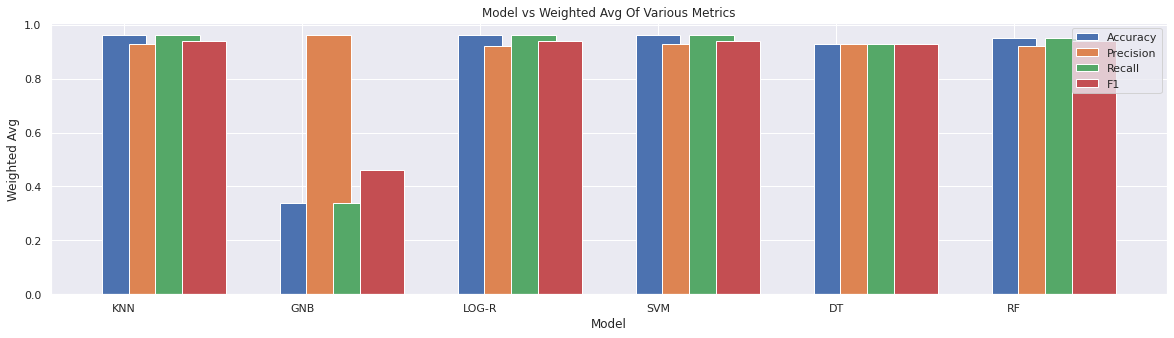

In [142]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X   = ['KNN','GNB','LOG-R','SVM', 'DT', 'RF']

#Collect this information from the classification reports and store them in lists
accuracy  = [0.96, 0.34, 0.96, 0.96, 0.93, 0.95]
precision = [0.93, 0.96, 0.92, 0.93, 0.93, 0.92]
recall    = [0.96, 0.34, 0.96, 0.96, 0.93, 0.95]
f1        = [0.94, 0.46, 0.94, 0.94, 0.93, 0.94]


#here we use np.arange to get the number of items to place on the x-axis 
X_axis = np.arange(len(X))

#the spacing between each bar each bar
spacing= 0.15

#setting the size of the graph
plt.rcParams["figure.figsize"] = (20,5)
  
#below we are plotting 4 bars for each label on the x-axis with the following syntax
#plt.bar(star_pos_for_each_bar, list_of_values, width_of each_bar, label_name_for each bar)
plt.bar(X_axis, accuracy, 0.25, label = 'Accuracy')
plt.bar(X_axis + spacing, precision, 0.25, label = 'Precision')
plt.bar(X_axis + spacing *2, recall, 0.25, label = 'Recall')
plt.bar(X_axis + spacing *3, f1, 0.25, label = 'F1')

#setting the range of values for the X axis
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()